
### Problem Statement
Predict the annual medical cost of individuals.

- **Target Variable:** `annual_medical_cost`
- **Type of ML Task:** Regression

In [9]:
%pip install pandas

In [8]:
%pip install matplotlib
%pip install numpy 
%pip install scikit-learn
%pip install fastapi
%pip install joblib


In [13]:

import pandas as pd

df = pd.read_csv('medical_cost_prediction_dataset.csv')
df.head()

,age,gender,bmi,smoker,diabetes,hypertension,heart_disease,asthma,physical_activity_level,daily_steps,sleep_hours,stress_level,doctor_visits_per_year,hospital_admissions,medication_count,insurance_type,insurance_coverage_pct,city_type,previous_year_cost,annual_medical_cost
0,69,Male,29.4,No,1,0,0,0,Medium,14825,4.4,8,1,0,4,Private,80,Semi-Urban,10885,2645.50
1,32,Female,22.9,No,1,0,0,0,Medium,3620,6.0,7,4,3,0,Government,64,Semi-Urban,18722,10959.70
2,89,Male,25.7,No,0,0,0,0,High,10578,4.5,7,2,0,3,NaN,0,Urban,4196,8409.80
3,78,Male,31.9,Yes,0,1,0,0,Low,6226,8.6,9,6,1,7,Government,70,Urban,11128,7996.62
4,38,Male,27.7,No,0,0,0,0,High,6253,5.7,3,6,0,6,Private,77,Urban,15110,3202.52



### Dataset Description
- **Source:** [https://www.kaggle.com/datasets/miadul/medical-cost-predication-dataset]
- **Shape:** (5000, 20)
- **Columns:** ['age', 'gender', 'bmi', 'smoker', 'diabetes', 'hypertension',
       'heart_disease', 'asthma', 'physical_activity_level', 'daily_steps',
       'sleep_hours', 'stress_level', 'doctor_visits_per_year',
       'hospital_admissions', 'medication_count', 'insurance_type',
       'insurance_coverage_pct', 'city_type', 'previous_year_cost',
       'annual_medical_cost'],
      dtype='object')



In [3]:

df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      5000 non-null   int64  
 1   gender                   5000 non-null   object 
 2   bmi                      5000 non-null   float64
 3   smoker                   5000 non-null   object 
 4   diabetes                 5000 non-null   int64  
 5   hypertension             5000 non-null   int64  
 6   heart_disease            5000 non-null   int64  
 7   asthma                   5000 non-null   int64  
 8   physical_activity_level  5000 non-null   object 
 9   daily_steps              5000 non-null   int64  
 10  sleep_hours              5000 non-null   float64
 11  stress_level             5000 non-null   int64  
 12  doctor_visits_per_year   5000 non-null   int64  
 13  hospital_admissions      5000 non-null   int64  
 14  medication_count        

,age,bmi,diabetes,hypertension,heart_disease,asthma,daily_steps,sleep_hours,stress_level,doctor_visits_per_year,hospital_admissions,medication_count,insurance_coverage_pct,previous_year_cost,annual_medical_cost
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,53.299000,25.970820,0.207600,0.288000,0.14220,0.096400,7993.216800,6.488140,5.475400,4.030600,1.001000,3.509000,57.953000,10248.515400,8048.886894
std,20.646851,5.046651,0.405629,0.452876,0.34929,0.295169,4052.127069,1.443361,2.892312,2.010689,0.978566,2.292721,31.627742,5626.095015,7071.020228
min,18.000000,6.400000,0.000000,0.000000,0.00000,0.000000,1004.000000,4.000000,1.000000,0.000000,0.000000,0.000000,0.000000,500.000000,404.950000
25%,36.000000,22.600000,0.000000,0.000000,0.00000,0.000000,4545.000000,5.200000,3.000000,3.000000,0.000000,1.000000,53.000000,5342.750000,3241.977500
50%,53.000000,25.900000,0.000000,0.000000,0.00000,0.000000,7989.000000,6.500000,5.000000,4.000000,1.000000,3.000000,71.000000,10281.000000,5539.780000
75%,71.000000,29.400000,0.000000,1.000000,0.00000,0.000000,11532.250000,7.700000,8.000000,5.000000,2.000000,6.000000,79.000000,15034.500000,10094.097500
max,89.000000,43.600000,1.000000,1.000000,1.00000,1.000000,14999.000000,9.000000,10.000000,14.000000,6.000000,7.000000,94.000000,19996.000000,44792.100000


In [4]:

# Check for missing values
df.isnull().sum()

# Value counts for categorical features
for col in df.select_dtypes(include='object').columns:
    print(df[col].value_counts())


gender
Female    2519
Male      2481
Name: count, dtype: int64
smoker
No     3779
Yes    1221
Name: count, dtype: int64
physical_activity_level
Low       1996
Medium    1986
High      1018
Name: count, dtype: int64
insurance_type
Private       1979
Government    1973
Name: count, dtype: int64
city_type
Urban         2474
Semi-Urban    1503
Rural         1023
Name: count, dtype: int64


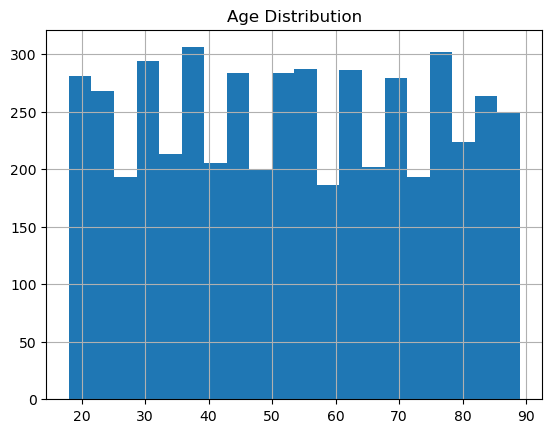

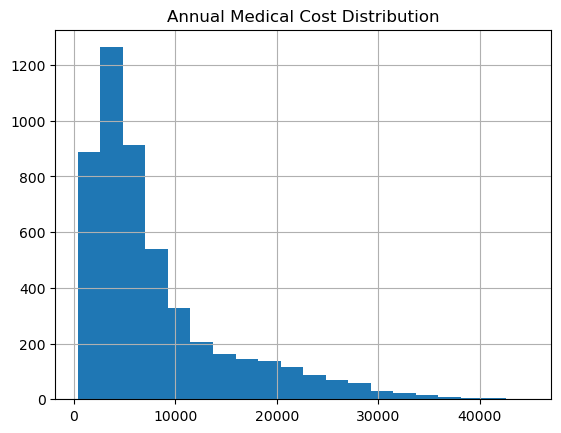

In [5]:

# Visualize distributions (for age and cost)
import matplotlib.pyplot as plt
df['age'].hist(bins=20)
plt.title('Age Distribution')
plt.show()

df['annual_medical_cost'].hist(bins=20)
plt.title('Annual Medical Cost Distribution')
plt.show()



Based on domain knowledge and EDA, the following features are likely to be predictive:
- Age, BMI, Smoker, Diabetes, Hypertension, Insurance Type, Previous Year Cost, etc.



### Metric Selection
I will use **Root Mean Squared Error (RMSE)** and **R-squared** as evaluation metrics.

- **RMSE** penalizes large errors and is interpretable in the same units as the target.
- **R-squared** shows the proportion of variance explained by the model.


In [16]:

# Encode categorical variables
from sklearn.preprocessing import OrdinalEncoder

cat_cols = df.select_dtypes(include='object').columns.tolist()
cat_cols = [col for col in cat_cols if col != 'annual_medical_cost']

encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
df[cat_cols] = encoder.fit_transform(df[cat_cols])

# Handling missing values
for col in df.select_dtypes(include='number').columns:
    df[col] = df[col].fillna(df[col].median())


In [17]:
#Train/test split

from sklearn.model_selection import train_test_split

X = df.drop('annual_medical_cost', axis=1)
y = df['annual_medical_cost']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [18]:
#Model training (Baseline)

from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [19]:
#Evaluation function

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

def evaluate(y_true, y_pred):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return {'RMSE': rmse, 'MAE': mae, 'R2': r2}

y_pred = model.predict(X_test)
evaluate(y_test, y_pred)


{'RMSE': np.float64(1030.3730209838063),
 'MAE': 633.9476570000002,
 'R2': 0.9782339922444101}

In [20]:
#Hyperparameter Tuning

from sklearn.model_selection import RandomizedSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

search = RandomizedSearchCV(RandomForestRegressor(random_state=42),
                            param_grid, n_iter=10, cv=3, scoring='neg_mean_squared_error')
search.fit(X_train, y_train)

best_model = search.best_estimator_
best_pred = best_model.predict(X_test)
evaluate(y_test, best_pred)


{'RMSE': np.float64(1019.0396072026681),
 'MAE': 630.8087199715567,
 'R2': 0.9787101819200812}

In [21]:
#Model Persistence

import joblib
joblib.dump(best_model, 'medical_cost_model.pkl')
joblib.dump(encoder, 'encoder.pkl')


['encoder.pkl']

In [22]:

# Preprocess test data 
X_test[cat_cols] = encoder.transform(X_test[cat_cols])
final_predictions = best_model.predict(X_test)


In [24]:
#Custom Prediction

sample = X_test.iloc[[0]]
sample_pred = best_model.predict(sample)
print("Custom prediction:", sample_pred[0])


Custom prediction: 2977.690345441087


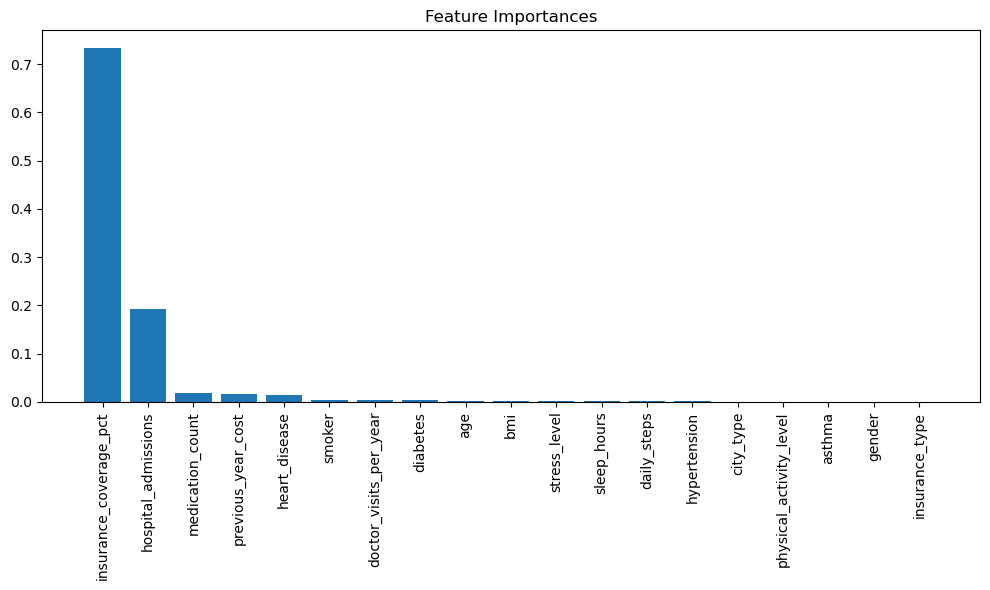

In [25]:
#Feature Importance

importances = best_model.feature_importances_
features = X.columns
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10,6))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), [features[i] for i in indices], rotation=90)
plt.tight_layout()
plt.show()


In [26]:

#FasAPI Deployment

from fastapi import FastAPI
from pydantic import BaseModel
import joblib
import pandas as pd

app = FastAPI()
model = joblib.load('medical_cost_model.pkl')
encoder = joblib.load('encoder.pkl')

class InputData(BaseModel):
    age: int
    gender: str
    bmi: float
    smoker: str
    diabetes: int
    hypertension: int
    heart_disease: int
    asthma: int
    physical_activity_level: str
    daily_steps: int
    sleep_hours: float
    stress_level: int
    doctor_visits_per_year: int
    hospital_admissions: int
    medication_count: int
    insurance_type: str
    insurance_coverage_pct: int
    city_type: str
    previous_year_cost: float

@app.post("/predict")
def predict(data: InputData):
    df = pd.DataFrame([data.dict()])
    # Encode categorical columns
    cat_cols = ['gender', 'smoker', 'physical_activity_level', 'insurance_type', 'city_type']
    df[cat_cols] = encoder.transform(df[cat_cols])
    prediction = model.predict(df)
    return {"predicted_annual_medical_cost": prediction[0]}
